In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import datetime as dt



In [2]:
filepath_call = r'C:\Users\User\Downloads\Quick Share\call_detail_records (1).csv'
df_raw = pd.read_csv(filepath_call)

conn = sqlite3.connect("nigeria_call_details.db")
df_raw.to_sql('raw_data', conn, if_exists= 'replace', index= 'False')

query = """SELECT * FROM  raw_data
            """


df = pd.read_sql(query, conn)
df.head(10)

,False,cdr_id,timestamp,operator,calling_number,called_number,call_type,duration_seconds,data_volume_mb,sms_count,tower_id,city,network_type,call_status
0,0,CDR00000001,2025-09-12 01:47:41,Airtel,2349078978178,2348057135387,data,0,69.63,0,LAG-8972,Lagos,4G,completed
1,1,CDR00000002,2025-09-14 13:49:36,MTN,2348133004465,2347035891260,data,0,342.29,0,WAR-7779,Warri,4G,completed
2,2,CDR00000003,2025-09-11 14:09:43,9mobile,2348090322661,2348127029601,voice,2897,0.00,0,BEN-3528,Benin City,3G,failed
3,3,CDR00000004,2025-09-24 01:05:05,Airtel,2347086040592,2348123412723,voice,1890,0.00,0,LAG-9961,Lagos,2G,completed
4,4,CDR00000005,2025-09-09 05:12:14,MTN,2348164725206,2349091687278,data,0,435.80,0,WAR-6565,Warri,4G,completed
5,5,CDR00000006,2025-09-05 12:01:16,Glo,2347058065309,2349058516114,data,0,156.13,0,ABU-9855,Abuja,4G,failed
6,6,CDR00000007,2025-09-24 13:42:38,Airtel,2347018172609,2347089257065,data,0,421.68,0,LAG-1713,Lagos,4G,dropped
7,7,CDR00000008,2025-09-28 23:37:25,Glo,2348116235907,2349082663185,voice,1319,0.00,0,ABA-3721,Aba,4G,completed
8,8,CDR00000009,2025-09-15 12:09:46,Airtel,2347011872192,2349083238788,data,0,24.23,0,KAD-7419,Kaduna,4G,completed
9,9,CDR00000010,2025-09-15 07:14:28,Glo,2348050193707,2348152000680,data,0,385.45,0,KAN-1861,Kano,2G,completed


In [3]:
def dates_and_time():
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors = 'coerce')
    df['date'] = df['timestamp'].dt.date
    df['time'] = df['timestamp'].dt.time
    df.duration_seconds = df.duration_seconds.apply(lambda x: x/60).round(2)



def index_and_sorts():
    df['date'] = pd.to_datetime(df['date']).dt.date
    #df['time'] =  df['time'].dt.time
    df.set_index('date', inplace= True)
    
    #df.sort_values(['date', 'time'],ascending= [True, True], inplace= True)
    #df['week'] = df['timestamp'].dt.hour
    df['peak'] = df['timestamp'].dt.hour
    

dates_and_time()
index_and_sorts()

In [ ]:
def error_checking_func(x)-> bool:
    
        a = x['duration_seconds']
        b = x['data_volume_mb']
        c = x['sms_count']


        total = a+b+c
        if (a > 0) + (b>0) + (c>0) == 1:
            return True
        
        else:
            return False




def call_error_checking():
     suspiciuos_calls_df = df[(df['call_type'] == 'voice') & (df['duration_seconds'] > 0) & (df['call_status'] == 'failed')]

     #imputed_data = df.loc[lambda x: x['call_status'] == 'failed'] = 'success'
     ratio = suspiciuos_calls_df.shape[0] / df.shape[0]
     if ratio < 0.05:
         print('WTF')
     else:
          df.drop(suspiciuos_calls_df.index, inplace = True)

call_error_checking()




MemoryError: Unable to allocate 2.44 GiB for an array with shape (327680000,) and data type int64

In [ ]:
df.info()

operator_list = [i for i in df.operator.unique()]
bundle_list = [i for i in df.call_type.unique()]
city_list = [i for i in df.city.unique()]
network_list = [i for i in df.network_type.unique()]
status_list = [i for i in df.call_status.unique()]

    

#temp_df = df.isna().sum()
#temp_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 2025-09-12 to 2025-09-10
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cdr_id            1000000 non-null  object 
 1   operator          1000000 non-null  object 
 2   calling_number    1000000 non-null  int64  
 3   called_number     1000000 non-null  int64  
 4   call_type         1000000 non-null  object 
 5   duration_seconds  1000000 non-null  float64
 6   data_volume_mb    1000000 non-null  float64
 7   sms_count         1000000 non-null  int64  
 8   tower_id          1000000 non-null  object 
 9   city              1000000 non-null  object 
 10  network_type      1000000 non-null  object 
 11  call_status       1000000 non-null  object 
 12  time              1000000 non-null  object 
 13  peak              1000000 non-null  int32  
dtypes: float64(2), int32(1), int64(3), object(8)
memory usage: 110.6+ MB


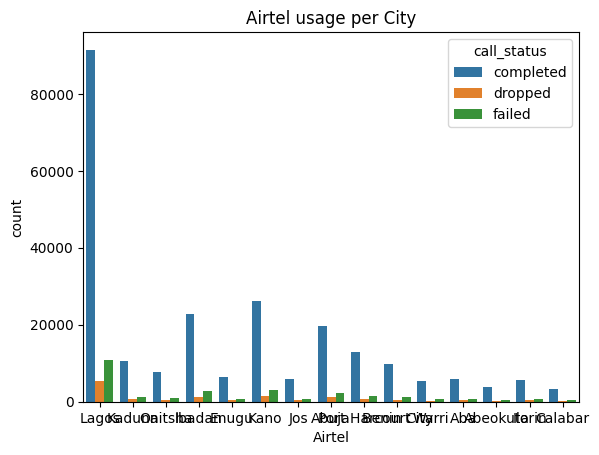

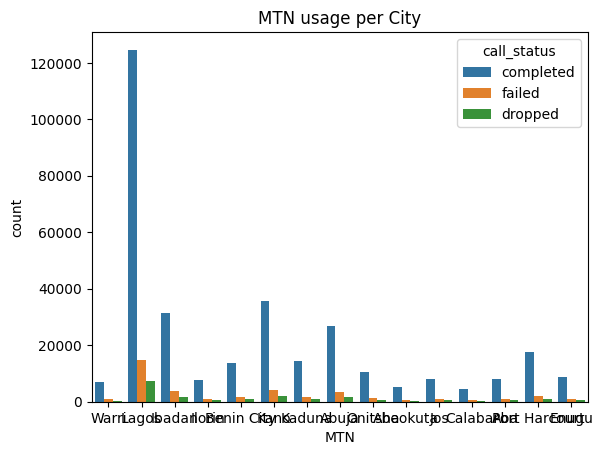

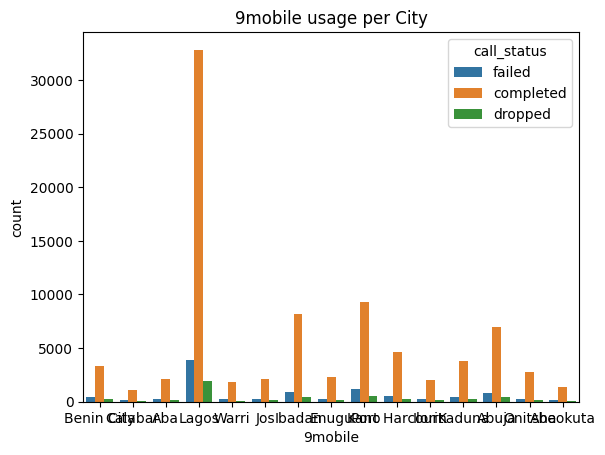

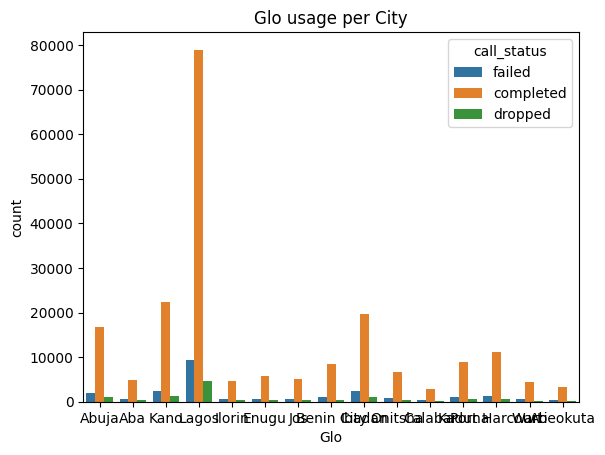

In [ ]:
#Use SQL for extraction
columns = [i for i in df.columns]
columns
operator_list

airtel_df = df.loc[lambda x: x['operator'] == 'Airtel',['city', 'call_status', 'duration_seconds','data_volume_mb', 'sms_count']]
mtn_df = df.loc[lambda x: x['operator'] == 'MTN',['city', 'call_status', 'duration_seconds','data_volume_mb', 'sms_count']]
nine_mobile_df = df.loc[lambda x: x['operator'] == '9mobile',['city', 'call_status', 'duration_seconds','data_volume_mb', 'sms_count']]
glo_df = df.loc[lambda x: x['operator'] == 'Glo',['city', 'call_status', 'duration_seconds','data_volume_mb', 'sms_count']]


operator_df_list = [airtel_df, mtn_df, nine_mobile_df, glo_df]
operator_dict = dict(zip(operator_list, operator_df_list))
for name, operator in operator_dict.items():
    sns.countplot(data= operator, x= 'city', hue= 'call_status')
    plt.title(label = f'{name} usage per City')
    plt.xlabel(xlabel= name,loc= 'center')
    plt.show()





In [ ]:
#Use SQL for extraction
bundle_list
data_df = df.loc[lambda x: x['call_type'] == 'data',['call_status','data_volume_mb','network_type', 'operator', 'time', 'peak']]
call_df = df.loc[lambda x: x['call_type'] == 'voice',['calling_number', 'called_number','call_status','duration_seconds', 'operator', 'time', 'peak']]
sms_df = df.loc[lambda x: x['call_type'] == 'sms',['calling_number', 'called_number','call_status','duration_seconds', 'operator', 'time', 'peak']]



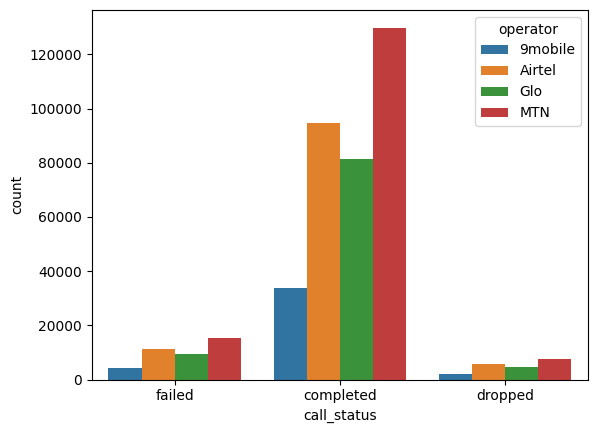

In [ ]:
#Use SQL for extraction
sns.countplot(data= call_df, x= 'call_status', hue= 'operator')
plt.show()

Rememeber to find out how many failed calls resulted in re_calls.
Find out how peak_hours  affect calls, data and sms's.


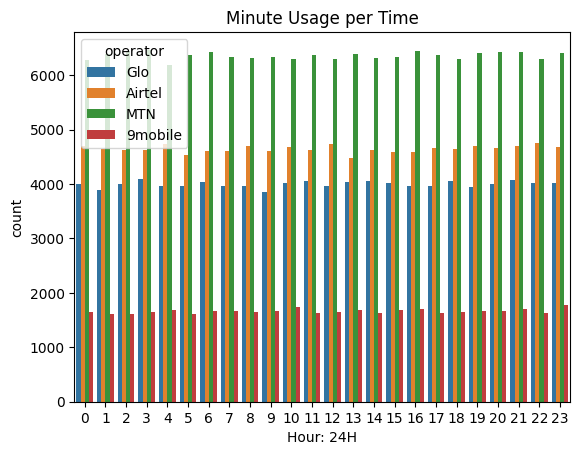

In [ ]:
sns.countplot(data= call_df, x= 'peak', hue= 'operator')
plt.title('Minute Usage per Time')
plt.xlabel('Hour: 24H')
plt.show()